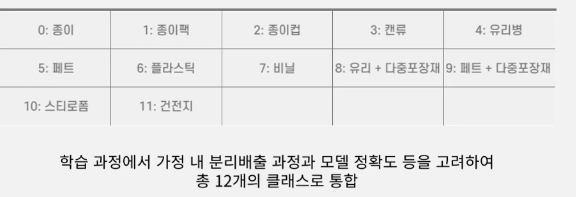

In [1]:
import ultralytics
ultralytics.checks()

/home/vit/venv/eda_venv/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Ultralytics 8.3.89 🚀 Python-3.12.3 torch-2.6.0+cu124 CPU (11th Gen Intel Core(TM) i7-11370H 3.30GHz)
Setup complete ✅ (8 CPUs, 23.2 GB RAM, 100.1/467.3 GB disk)


In [2]:
from ultralytics import YOLO
# Load the model
model = YOLO('/home/vit/dev_ws/project/deepcycle_project/src/12_model.pt')  # load a pretrained model
print(type(model.names),len(model.names))

<class 'dict'> 12


In [3]:
# Perform inference
results = model(['/home/vit/dev_ws/project/deepcycle_project/data/ex1.jpg','/home/vit/dev_ws/project/deepcycle_project/data/ex2.jpg'])

# Print the results
#results    results = (results , img_vec , x)


0: 640x480 2 0s, 1 3, 1 6, 1 8, 222.1ms
1: 640x480 3 10s, 222.1ms
Speed: 8.0ms preprocess, 222.1ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 480)


In [4]:
results[0][0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11'}
obb: None
orig_img: array([[[ 62,  45,  42],
        [ 72,  55,  52],
        [ 85,  64,  62],
        ...,
        [ 30,  27,  23],
        [ 26,  23,  19],
        [ 22,  19,  15]],

       [[133, 116, 113],
        [132, 115, 112],
        [128, 109, 106],
        ...,
        [ 30,  27,  23],
        [ 22,  19,  15],
        [ 15,  12,   8]],

       [[214, 199, 196],
        [205, 188, 185],
        [187, 168, 165],
        ...,
        [ 31,  28,  24],
        [ 22,  19,  15],
        [ 14,  11,   7]],

       ...,

       [[ 16,  22,  17],
        [ 19,  25,  20],
        [ 24,  30,  25],
        ...,
        [ 18,  19,  15],
        [ 18,  19,  15],
        [ 12,  13,   9]],

       [[ 21,  27,  22],
        [ 24,  30,  25],
        [ 26, 

In [5]:
box = results[0][1].boxes
box

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([6.])
conf: tensor([0.8698])
data: tensor([[1.5436e+03, 2.3531e+02, 3.0202e+03, 2.6483e+03, 8.6977e-01, 6.0000e+00]])
id: None
is_track: False
orig_shape: (4032, 3024)
shape: torch.Size([1, 6])
xywh: tensor([[2281.8811, 1441.8016, 1476.5581, 2412.9797]])
xywhn: tensor([[0.7546, 0.3576, 0.4883, 0.5985]])
xyxy: tensor([[1543.6021,  235.3118, 3020.1602, 2648.2915]])
xyxyn: tensor([[0.5105, 0.0584, 0.9987, 0.6568]])

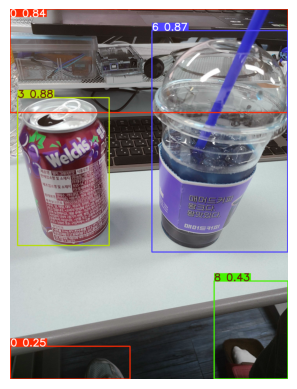

In [6]:
import matplotlib.pyplot as plt

# 첫 번째 이미지 결과를 시각화
img_result = results[0].plot()  # 결과를 numpy 배열 형태로 반환
plt.imshow(img_result)
plt.axis('off')
plt.show()


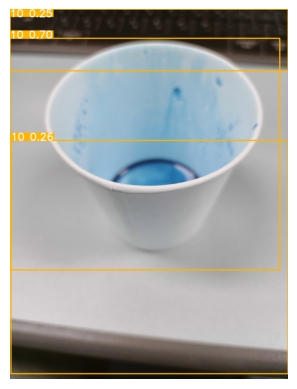

In [7]:
import matplotlib.pyplot as plt

# 두 번째 이미지 결과를 시각화
img_result = results[1].plot()  # 결과를 numpy 배열 형태로 반환
plt.imshow(img_result)
plt.axis('off')
plt.show()


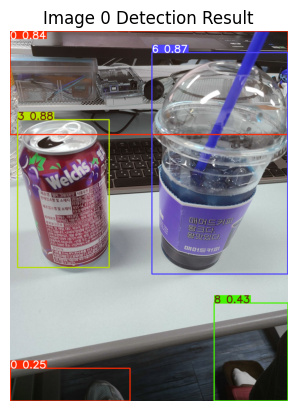

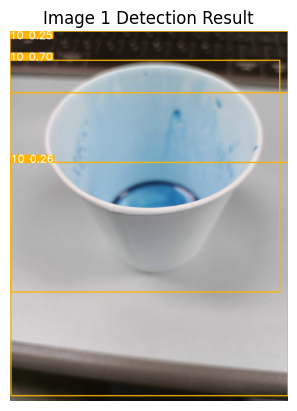

In [8]:
for i, r in enumerate(results):
    img_result = r.plot()
    plt.figure()
    plt.imshow(img_result)
    plt.axis('off')
    plt.title(f"Image {i} Detection Result")
    plt.show()


In [2]:
import cv2
from ultralytics import YOLO

# 1. 모델 로드
model = YOLO('/home/vit/dev_ws/project/deepcycle_project/src/12_model.pt')

# 2. 웹캠 연결 
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("웹캠을 열 수 없습니다.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("프레임을 읽을 수 없습니다.")
        break

    # 3. 모델 추론 시 conf=0.5 파라미터를 통해 0.5 이상인 결과만 반영
    results = model(frame, conf=0.5)

    # 4. 결과 시각화 (신뢰도가 0.5 미만인 객체는 표시되지 않음)
    annotated_frame = results[0].plot()

    # 5. 결과 이미지를 화면에 표시
    cv2.imshow("YOLO Detection", annotated_frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
         break

# 6. 웹캠 및 윈도우 리소스 해제
cap.release()
cv2.destroyAllWindows()



0: 480x640 1 0, 286.5ms
Speed: 2.1ms preprocess, 286.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 0s, 1 8, 387.9ms
Speed: 2.9ms preprocess, 387.9ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 0s, 1 9, 274.9ms
Speed: 13.3ms preprocess, 274.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 0s, 1 9, 259.6ms
Speed: 14.9ms preprocess, 259.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 0s, 1 9, 241.2ms
Speed: 7.4ms preprocess, 241.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 0s, 1 9, 236.8ms
Speed: 6.9ms preprocess, 236.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 0s, 246.8ms
Speed: 6.3ms preprocess, 246.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 0, 232.5ms
Speed: 5.5ms preprocess, 232.5ms inference, 2.6ms postprocess per image at shape 

![Screenshot from 2025-03-14 10-55-20.png](<attachment:Screenshot from 2025-03-14 10-55-20.png>)
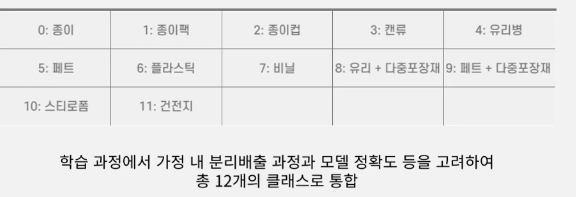

In [13]:
import cv2
from ultralytics import YOLO

# 1. 모델 로드
model = YOLO('/home/vit/dev_ws/project/deepcycle_project/src/12_model.pt')

# 2. 웹캠 연결 
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("웹캠을 열 수 없습니다.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("프레임을 읽을 수 없습니다.")
        break

    # 3. 웹캠의 원본 프레임을 실시간으로 표시 (검출 결과는 아님)
    cv2.imshow("Webcam Feed", frame)
    
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('c'):
        # 'c' 키를 누르면 현재 프레임 캡쳐 후 모델 추론 진행
        results = model(frame, conf=0.5)
        annotated_frame = results[0].plot()
        
        # 캡쳐된 이미지의 탐지 결과를 별도의 창에 표시
        cv2.imshow("YOLO Detection", annotated_frame)
        print("탐지 결과를 표시합니다. 창을 닫으려면 아무 키나 누르세요.")
        cv2.waitKey(0)
        cv2.destroyWindow("YOLO Detection")
    
    elif key == ord('q'):
        # 'q' 키를 누르면 종료
        break

# 4. 웹캠 및 윈도우 리소스 해제
cap.release()
cv2.destroyAllWindows()



0: 480x640 1 0, 1 3, 289.0ms
Speed: 1.7ms preprocess, 289.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
탐지 결과를 표시합니다. 창을 닫으려면 아무 키나 누르세요.

0: 480x640 1 0, 1 10, 206.9ms
Speed: 1.3ms preprocess, 206.9ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
탐지 결과를 표시합니다. 창을 닫으려면 아무 키나 누르세요.

0: 480x640 1 0, 159.7ms
Speed: 2.4ms preprocess, 159.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
탐지 결과를 표시합니다. 창을 닫으려면 아무 키나 누르세요.

0: 480x640 1 0, 140.1ms
Speed: 3.5ms preprocess, 140.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
탐지 결과를 표시합니다. 창을 닫으려면 아무 키나 누르세요.

0: 480x640 1 0, 140.9ms
Speed: 2.5ms preprocess, 140.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
탐지 결과를 표시합니다. 창을 닫으려면 아무 키나 누르세요.

0: 480x640 1 0, 148.3ms
Speed: 1.7ms preprocess, 148.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
탐지 결과를 표시합니다. 창을 닫으려면 아무 키나 누르세요.

0: 480x640 (no detections), 148.2ms
Speed: 2.5

In [12]:
print(model.names)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11'}


In [ ]:
from ultralytics import YOLO
# Load the model
model = YOLO('/home/vit/dev_ws/project/deepcycle_project/src/12_model.pt')  # load a pretrained model
print(type(model.names),len(model.names))

# Perform inference
result = model('/home/vit/dev_ws/project/deepcycle_project/data/ex3.jpg')



image 1/1 /home/vit/dev_ws/project/deepcycle_project/data/ex3.jpg: 640x480 1 0, 314.2ms
Speed: 8.7ms preprocess, 314.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


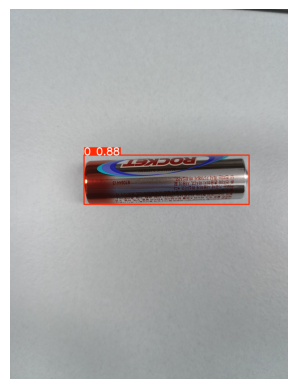

In [ ]:
import matplotlib.pyplot as plt

img_result = result[0].plot()  # 결과를 numpy 배열 형태로 반환
plt.imshow(img_result)
plt.axis('off')
plt.show()